In [16]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Subplots

<IPython.core.display.Javascript object>


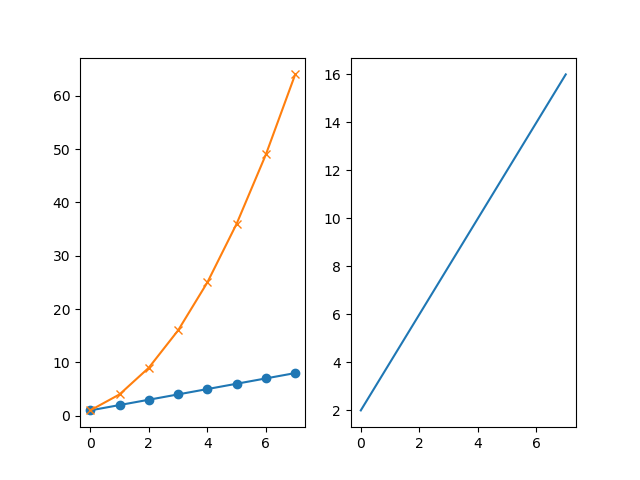

In [17]:
# 创建多个图表
plt.subplot(1, 2, 1)  # 1 行，2 列，在第 1 个图上绘制

linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')
plt.plot(linear_data**2, '-x')

In [18]:
plt.subplot(1, 2, 2)
plt.plot(linear_data*2, '-')

<IPython.core.display.Javascript object>


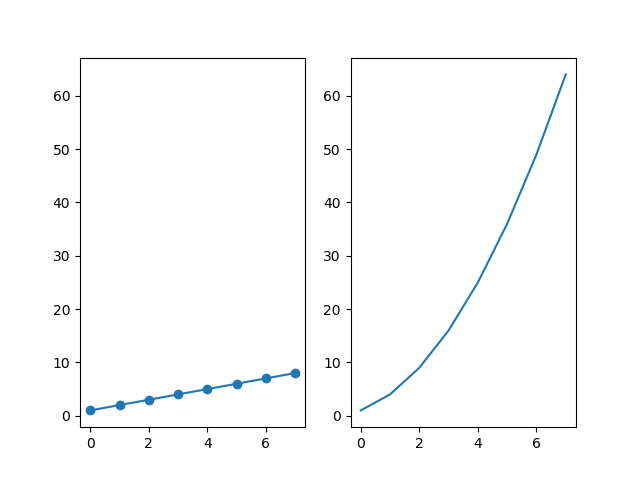

In [19]:
# 保证子图中坐标范围一致
plt.figure()  # figure() 新建立图表窗口

ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)  # 如果没有 sharey=ax1 则两个图表 y 轴刻度不一致
plt.plot(linear_data**2, '-')

<IPython.core.display.Javascript object>


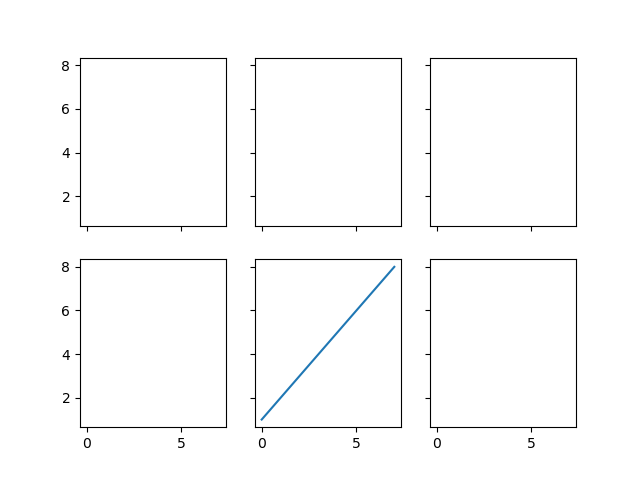

In [21]:
# plt.subplots() 并列图表
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
ax5.plot(linear_data, '-')

## 直方图

<IPython.core.display.Javascript object>


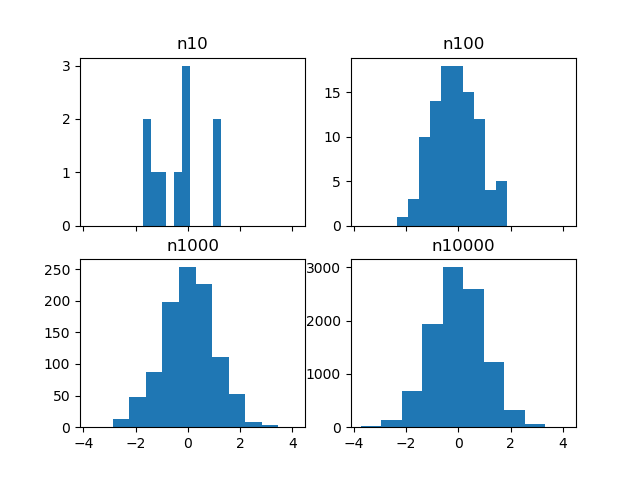

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)  # 正态分布的样本
    # 默认 bin 的个数为 10
    axs[n].hist(sample)
    axs[n].set_title('n{}'.format(sample_size))

<IPython.core.display.Javascript object>


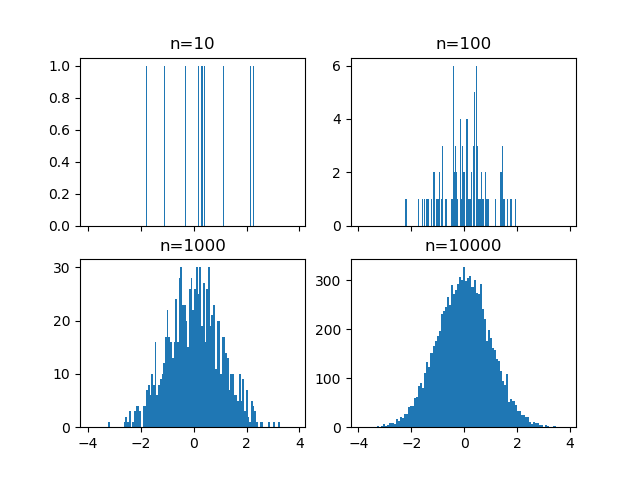

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # bin设为100
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


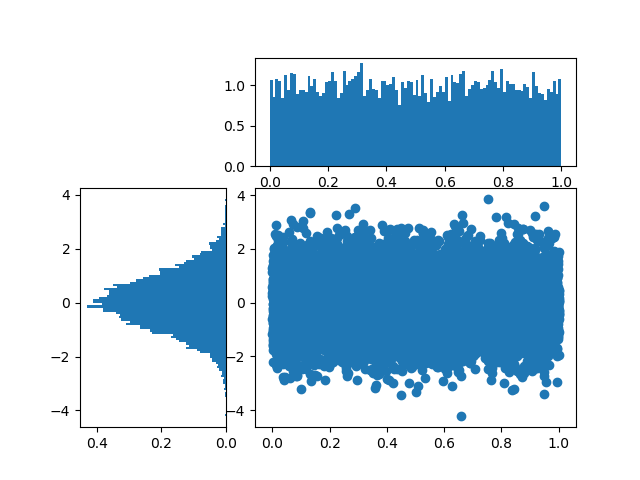

In [64]:
# 使用gridspec和直方图绘制一个复杂分析图
import matplotlib.gridspec as gridspec

x = np.random.random(size=10000)  # 随机分布样本
y = np.random.normal(loc=0., scale=1., size=10000)  # 正态分布样本

plt.figure()
gspec = gridspec.GridSpec(3, 3)  # 划分 3 行 3 列

top_hist = plt.subplot(gspec[0, 1:])  # 在 0 行 1、2 列绘制
side_hist = plt.subplot(gspec[1:, 0])  # 在 1、2 行 0 列绘制
lower_right = plt.subplot(gspec[1:, 1:])  # 在 1、2 行 1、2 列绘制

lower_right.scatter(x, y)  # 散点图
top_hist.hist(x, bins=100, normed=True)  # x 直方图
side_hist.hist(y, bins=100, orientation='horizontal', normed=True)  # y 直方图
side_hist.invert_xaxis()  # 设置方向

## 盒形图

In [41]:
# 正态分布采样
normal_sample = np.random.normal(loc=0., scale=1., size=10000)
# 随机数采样
random_sample = np.random.random(size=10000)
# gamma分布采样
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                  'random':random_sample, 
                  'gamma':gamma_sample})
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.992190,0.008603,0.500879
std,1.402894,0.990700,0.289344
min,0.001240,-3.719354,0.000003
25%,0.971473,-0.656016,0.250070
50%,1.676378,0.008107,0.506253
75%,2.684981,0.677663,0.750188
max,12.155005,4.216671,0.999912


<IPython.core.display.Javascript object>


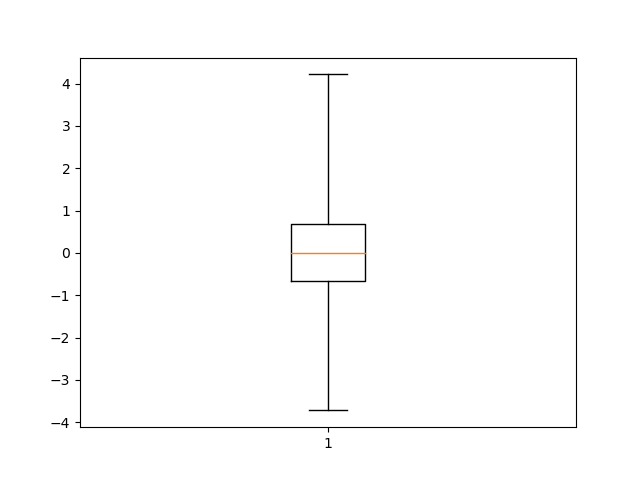

{'boxes': [<matplotlib.lines.Line2D at 0x1ecd33ca668>],
 'caps': [<matplotlib.lines.Line2D at 0x1ecd33dac50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ecd30c6860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ecd30c66d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1ecd33caa20>,
  <matplotlib.lines.Line2D at 0x1ecd33da240>]}

In [43]:
plt.figure()
plt.boxplot(df['normal'], whis='range')

<IPython.core.display.Javascript object>


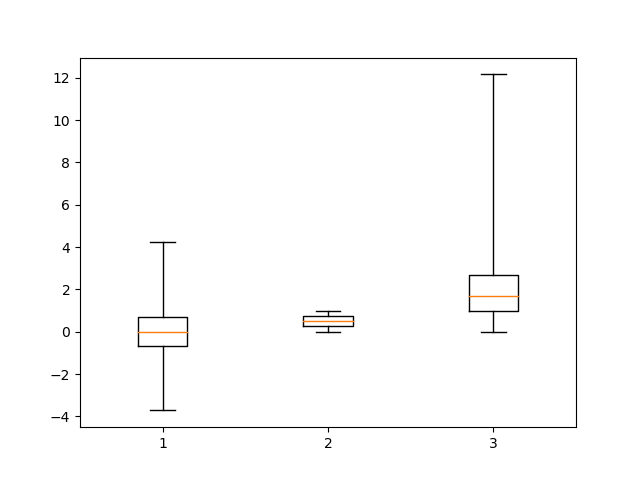

{'boxes': [<matplotlib.lines.Line2D at 0x1ecd1bbe2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecd1bbeba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ecd65c2860>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ecd65c2438>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1ecd1bbe0f0>,
  <matplotlib.lines.Line2D at 0x1ecd65cc2b0>]}

In [47]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

<IPython.core.display.Javascript object>


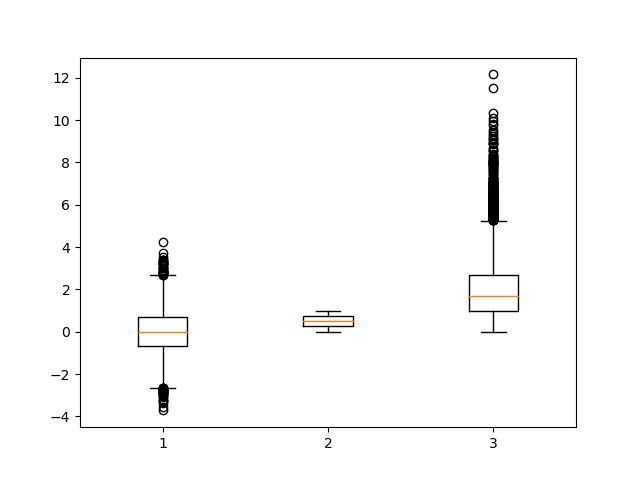

{'boxes': [<matplotlib.lines.Line2D at 0x1ecd1b384a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecd1b38eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ecd1b1ab70>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ecd1b1a748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1ecd1b385f8>,
  <matplotlib.lines.Line2D at 0x1ecd18c6908>]}

In [48]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']])

## 热图

<IPython.core.display.Javascript object>


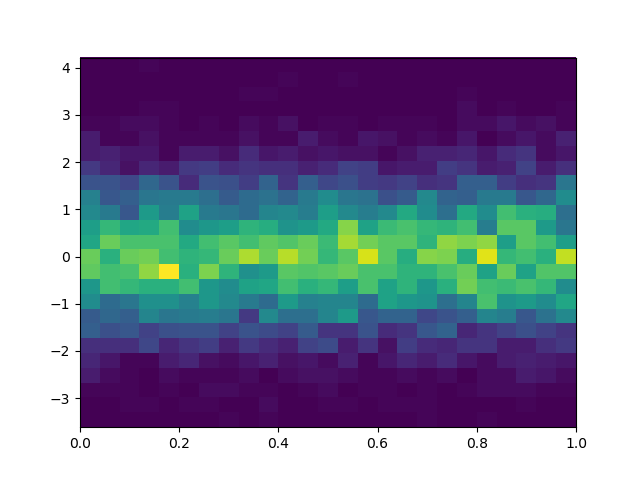

(array([[ 0.,  0.,  1.,  5.,  7.,  9., 20., 19., 32., 35., 50., 51., 39.,
         37., 31., 29., 17., 11.,  5.,  5.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  4.,  9., 16., 22., 23., 46., 46., 42., 51.,
         44., 27., 18., 17.,  7.,  6.,  1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  1.,  1.,  1.,  9., 18., 20., 26., 44., 47., 51., 47.,
         39., 18., 20., 14.,  3.,  4.,  1.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  1., 14., 13., 30., 33., 42., 55., 52., 47.,
         40., 36., 26., 22.,  7.,  4.,  3.,  2.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  2.,  5.,  7., 16., 26., 33., 42., 66., 46., 47.,
         46., 28., 27., 17.,  5.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  7., 10., 17., 27., 29., 46., 42., 43., 40.,
         32., 38., 27.,  8., 11.,  5.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  1.,  3., 12., 17., 28., 35., 35., 53., 44., 46.,
         35., 27., 24., 17., 12.,  5.,  1.,  1.,  0.,  0.,  0.

In [49]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=25)

<IPython.core.display.Javascript object>


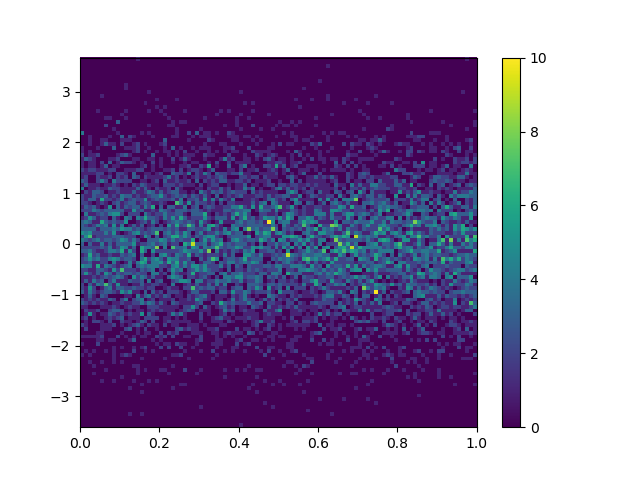

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([3.32483141e-05, 1.00323518e-02, 2.00314552e-02, 3.00305586e-02,
        4.00296621e-02, 5.00287655e-02, 6.00278690e-02, 7.00269724e-02,
        8.00260759e-02, 9.00251793e-02, 1.00024283e-01, 1.10023386e-01,
        1.20022490e-01, 1.30021593e-01, 1.40020697e-01, 1.50019800e-01,
        1.60018903e-01, 1.70018007e-01, 1.80017110e-01, 1.90016214e-01,
        2.00015317e-01, 2.10014421e-01, 2.20013524e-01, 2.30012628e-01,
        2.40011731e-01, 2.50010834e-01, 2.60009938e-01, 2.70009041e-01,
        2.80008145e-01, 2.90007248e-01, 3.00006352e-01, 3.10005455e-01,
        3.20004559e-01, 3.30003662e-01, 3.40002765e-01, 3.50001869e-01,
        3.60000972e-01, 3.70000076e-01, 3.79999179e-01, 3.89998283e-01,
        3.99997386e-01, 4.09996

In [51]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=100)

In [52]:
plt.colorbar()